In [1]:
import functions as fncs
import test_problems as test

import importlib

In [57]:
importlib.reload(fncs)
importlib.reload(test)

<module 'test_problems' from 'c:\\Users\\sindr\\Documents\\GitHub\\Masters_Thesis\\test_problems.py'>

# HJB test

## $b=1$

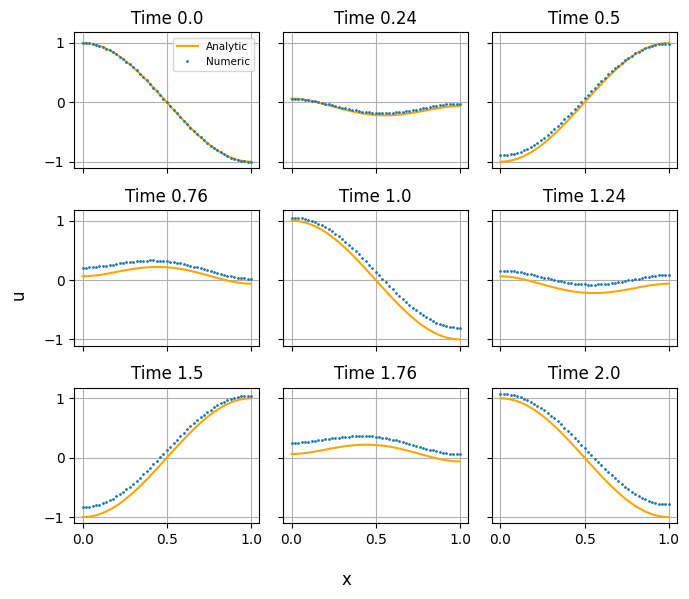

In [3]:
test1_HJ = test.Test1_HJ(lamda=1, N_x=50, b=1, t_end=2)
U_1 = fncs.HJ_implicit(fncs.godunov, **test1_HJ.setup_dict)
fncs.plot_different_times(U_1,test1_HJ.u,test1_HJ.setup_dict, sharey=True, ylabel="u", filename="HJB_b1")

The relative error is: 9.86e-01
Finished N_x=10

The relative error is: 5.15e-01
Finished N_x=20

The relative error is: 2.64e-01
Finished N_x=40



c:\Users\sindr\Documents\GitHub\Masters_Thesis\functions.py:388: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  return fsolve(_HJ_scheme_implicit, U_internal_start_guess,


The relative error is: 1.34e-01
Finished N_x=80

The relative error is: 6.75e-02
Finished N_x=160

The relative error is: 3.39e-02
Finished N_x=320

The relative error is: 1.70e-02
Finished N_x=640

Numerical convergence rate: 0.999


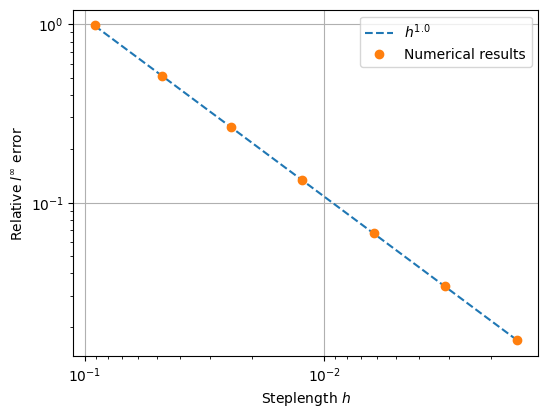

In [4]:
fncs.loglog(fncs.HJ_implicit,[10,20,40,80,160,320,640], test1_HJ,fncs.godunov, filename="HJB_b1_loglog")

In [5]:
# Removes these large data structures from the computer memory
del test1_HJ
del U_1

## $b=0.01$

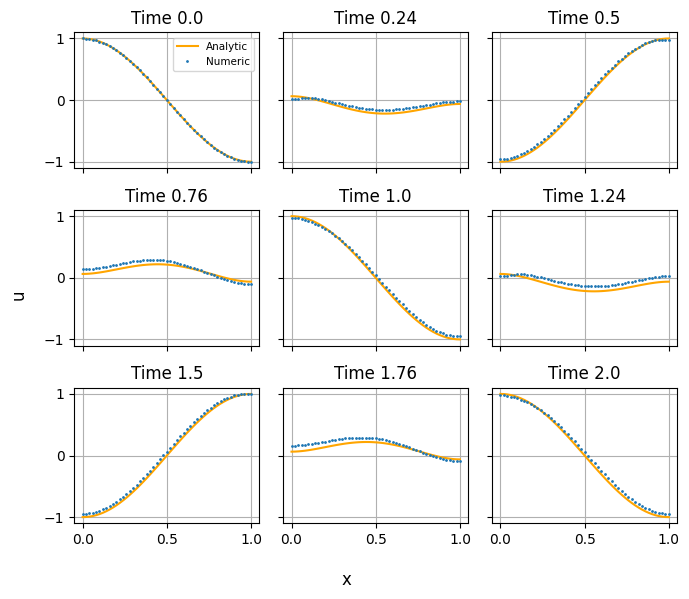

In [6]:
test2_HJ = test.Test1_HJ(lamda=1, N_x=50, b=0.01, t_end=2)
U_2 = fncs.HJ_implicit(fncs.godunov, **test2_HJ.setup_dict)
fncs.plot_different_times(U_2,test2_HJ.u,test2_HJ.setup_dict, sharey=True,  ylabel="u", filename="HJB_b001")

The relative error is: 4.03e-01
Finished N_x=10

The relative error is: 1.55e-01
Finished N_x=20

The relative error is: 7.59e-02
Finished N_x=40

The relative error is: 3.93e-02
Finished N_x=80

The relative error is: 2.04e-02
Finished N_x=160

The relative error is: 1.04e-02
Finished N_x=320

The relative error is: 5.27e-03
Finished N_x=640

Numerical convergence rate: 1.06


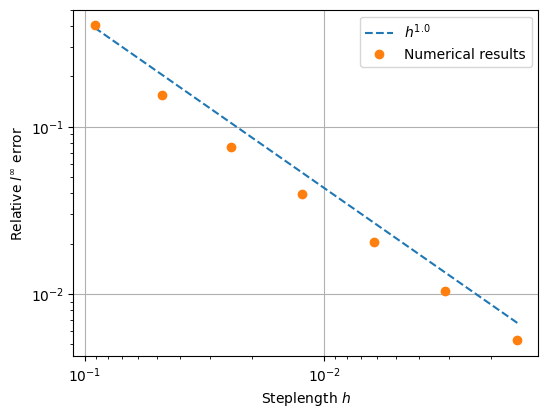

In [7]:
fncs.loglog(fncs.HJ_implicit,[10,20,40,80,160,320,640], test2_HJ,fncs.godunov, filename="HJB_b001_loglog")

In [8]:
# Removes these large data structures from the computer memory
del test2_HJ
del U_2

# FP test

## $b=1$

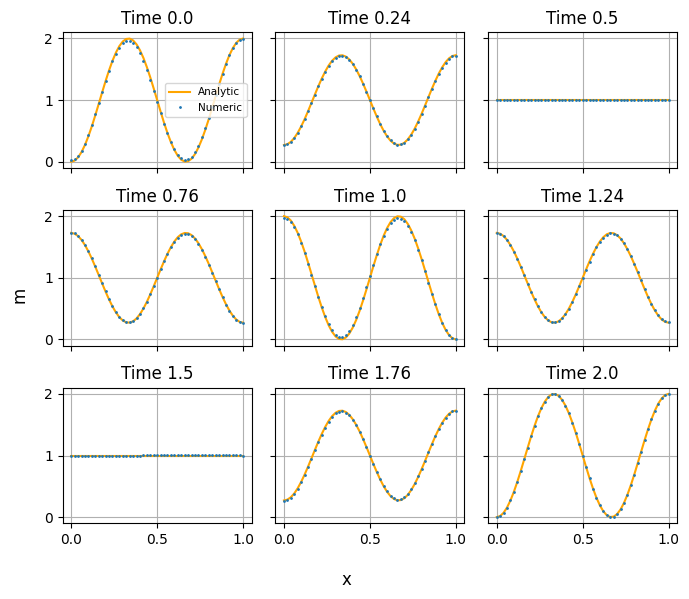

In [9]:
test1_FP = test.Test1_FP(lamda=1, N_x=50, b=1, t_end=2)
M_1 = fncs.FP_implicit(fncs.godunov, **test1_FP.setup_dict)
fncs.plot_different_times(M_1,test1_FP.m,test1_FP.setup_dict, sharey=True,  ylabel="m",filename="FP_b1")

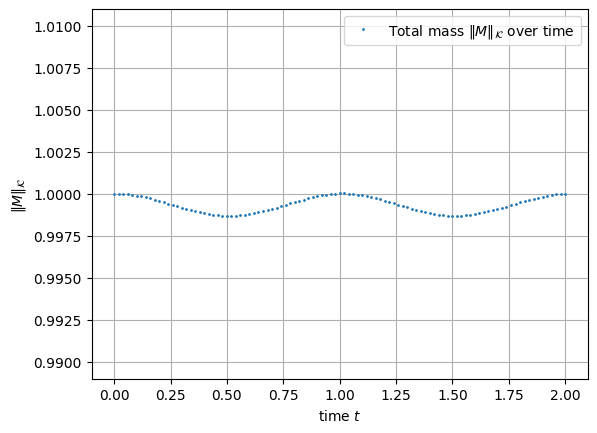

In [10]:
fncs.plot_total_mass(**test1_FP.setup_dict, filename="FP_b1_total_mass")

The relative error is: 7.72e-02
Finished N_x=10

The relative error is: 4.74e-02
Finished N_x=20

The relative error is: 2.66e-02
Finished N_x=40

The relative error is: 1.42e-02
Finished N_x=80

The relative error is: 7.33e-03
Finished N_x=160

The relative error is: 3.74e-03
Finished N_x=320

The relative error is: 1.88e-03
Finished N_x=640

The relative error is: 9.41e-04
Finished N_x=1280

Numerical convergence rate: 0.922


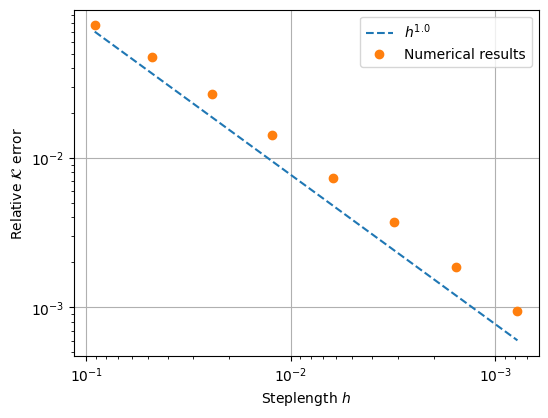

In [11]:
fncs.loglog(fncs.FP_implicit,[10,20,40,80,160,320,640,1280], test1_FP,fncs.godunov, filename="FP_b1_loglog")

In [12]:
# Removes these large data structures from the computer memory
del test1_FP
del M_1

## $b=0.01$

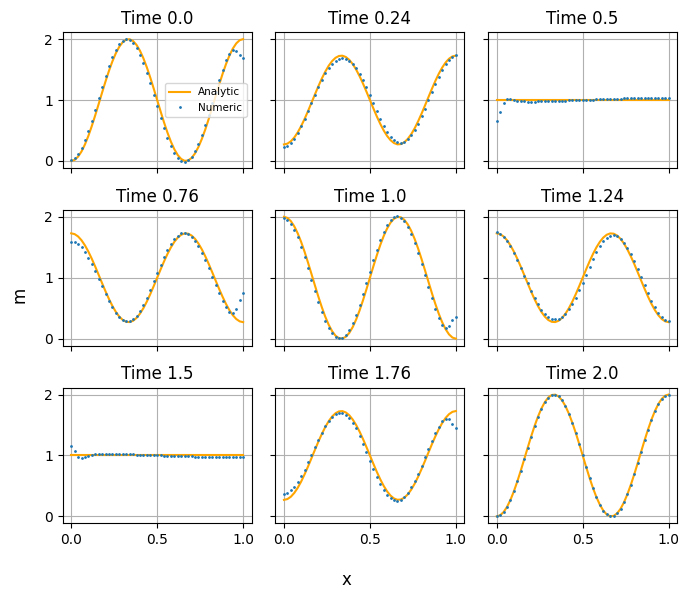

In [13]:
test2_FP = test.Test1_FP(lamda=1, N_x=50, b=0.01, t_end=2)
M_2 = fncs.FP_implicit(fncs.godunov, **test2_FP.setup_dict)
fncs.plot_different_times(M_2,test2_FP.m,test2_FP.setup_dict, sharey=True,  ylabel="m", filename="FP_b001")

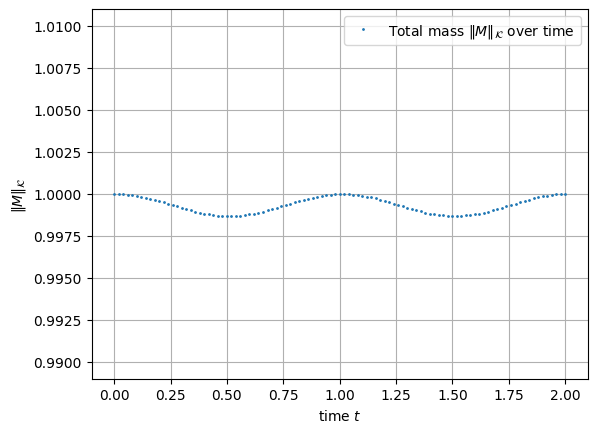

In [14]:
fncs.plot_total_mass(**test2_FP.setup_dict, filename="FP_b001_total_mass")

The relative error is: 3.06e-01
Finished N_x=10

The relative error is: 1.71e-01
Finished N_x=20

The relative error is: 8.48e-02
Finished N_x=40

The relative error is: 4.16e-02
Finished N_x=80

The relative error is: 2.04e-02
Finished N_x=160

The relative error is: 1.01e-02
Finished N_x=320

The relative error is: 5.19e-03
Finished N_x=640

The relative error is: 2.72e-03
Finished N_x=1280

Numerical convergence rate: 1.02


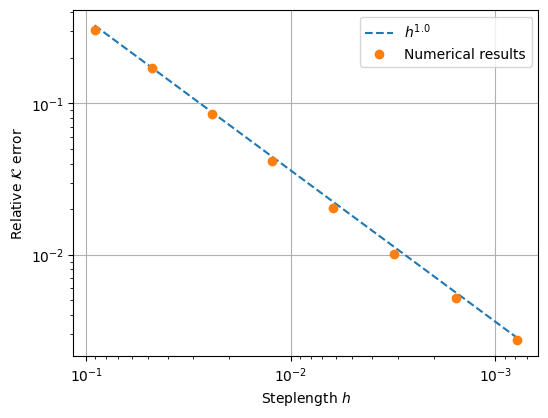

In [15]:
fncs.loglog(fncs.FP_implicit,[10,20,40,80,160,320,640,1280], test2_FP,fncs.godunov, filename="FP_b001_loglog")

In [16]:
# Removes these large data structures from the computer memory
del test2_FP
del M_2

# MFG test

## $b=1$

Stopped due to very small change in resulting matrices.
iteration #12


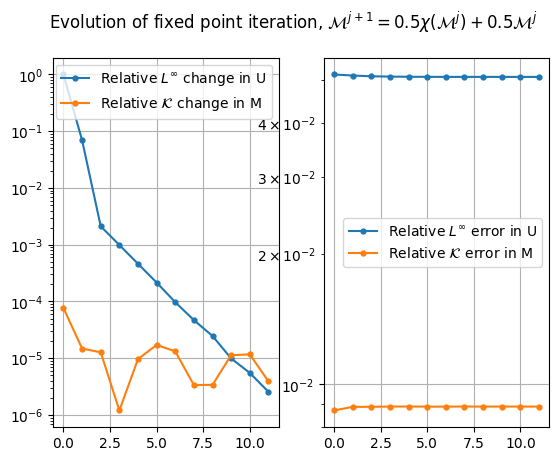

In [42]:
test1_MFG = test.Test1_MFG(N_x=200,t_end=2,b=1)
U_MFG_1,M_MFG_1 = fncs.MFG_solver(fncs.HJ_implicit, fncs.FP_implicit,fncs.godunov,
                              **test1_MFG.setup_dict, m=test1_MFG.m, u= test1_MFG.u,
                              stop=10**-5, iterations=30, a = 1/2)

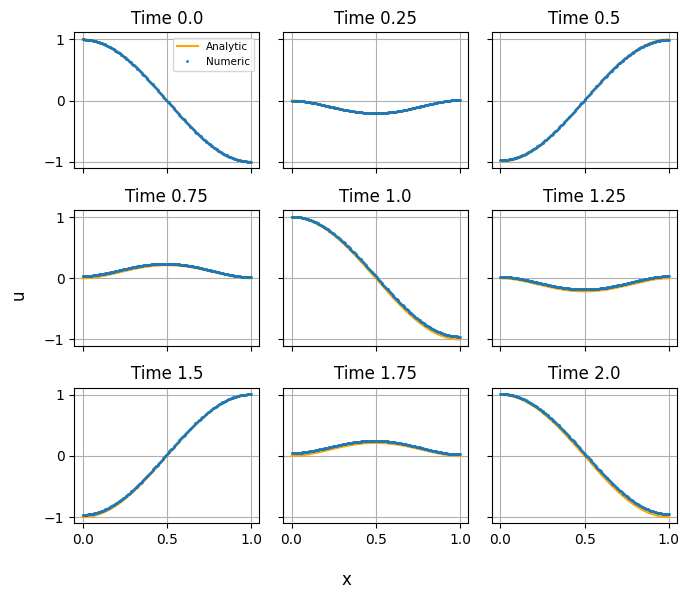

In [43]:
fncs.plot_different_times(U_MFG_1, test1_MFG.u, test1_MFG.setup_dict,sharey=True, ylabel="u", filename="DVM_b1_u")

In [44]:
U_analytic_MFG_1 = test1_MFG.u(test1_MFG.setup_dict["grid_x"],test1_MFG.setup_dict["grid_t"])
U_error_MFG_1 = fncs._calc_rel_error(U_MFG_1[:,-1],U_analytic_MFG_1[:,-1],"infty")
print("The relative l-infinity error in U in the last timestep is {:.2e}".format(U_error_MFG_1))

The relative l-infinity error in U in the last timestep is 5.10e-02


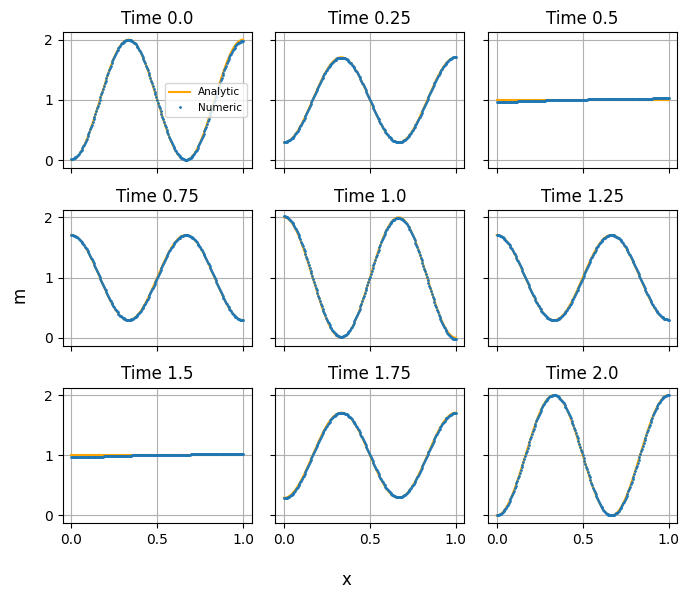

In [45]:
fncs.plot_different_times(M_MFG_1, test1_MFG.m, test1_MFG.setup_dict, sharey=True, ylabel="m", filename="DVM_b1_m")

In [46]:
M_analytic_MFG_1 = test1_MFG.m(test1_MFG.setup_dict["grid_x"],test1_MFG.setup_dict["grid_t"])
M_error_MFG_1 = fncs._calc_rel_error(M_MFG_1[:,0],M_analytic_MFG_1[:,0],"K")
print("The relative K error in M in the last timestep is {:.2e}".format(M_error_MFG_1))

The relative K error in M in the last timestep is 8.90e-03


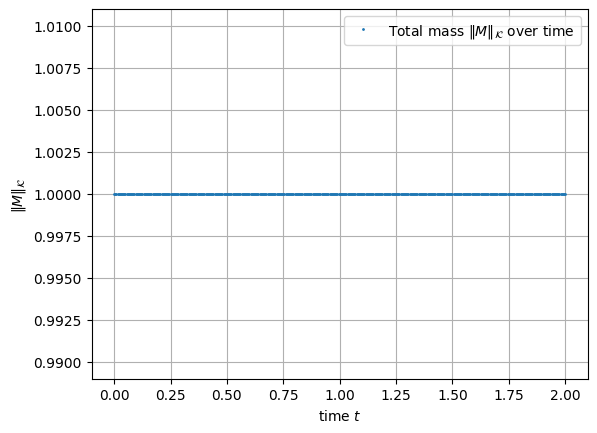

In [47]:
fncs.plot_total_mass(**test1_MFG.setup_dict, filename="DVM_b1_total_mass")

In [48]:
# Removes these large data structures from the computer memory
del test1_MFG
del U_MFG_1, U_analytic_MFG_1, U_error_MFG_1
del M_MFG_1, M_analytic_MFG_1, M_error_MFG_1


## $b=0.1$

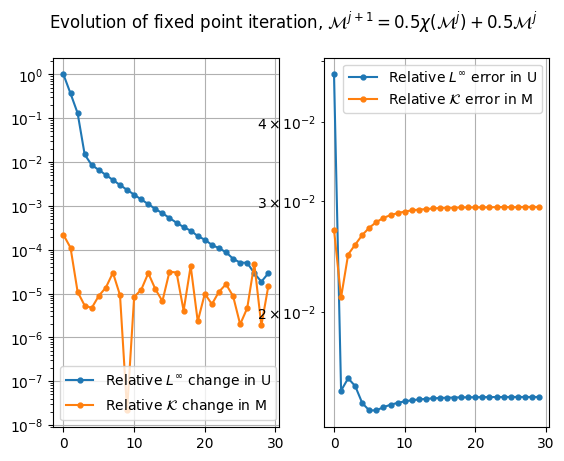

In [49]:
test2_MFG = test.Test1_MFG(N_x=200,t_end=2,b=0.1)
U_MFG_2,M_MFG_2 = fncs.MFG_solver(fncs.HJ_implicit, fncs.FP_implicit,fncs.godunov,
                              **test2_MFG.setup_dict, m=test2_MFG.m, u= test2_MFG.u,
                              stop=10**-5, iterations=30, a = 1/2)

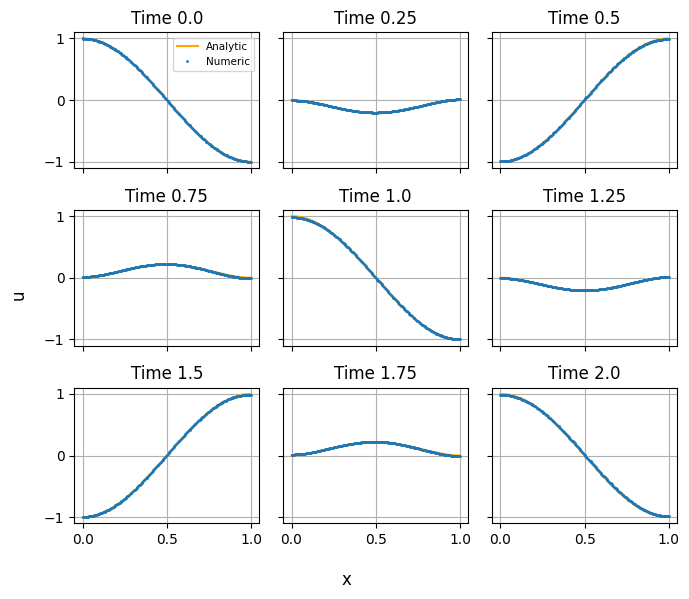

In [50]:
fncs.plot_different_times(U_MFG_2, test2_MFG.u, test2_MFG.setup_dict,sharey=True, ylabel="u", filename="DVM_b01_u")

In [51]:
U_analytic_MFG_2 = test2_MFG.u(test2_MFG.setup_dict["grid_x"],test2_MFG.setup_dict["grid_t"])
U_error_MFG_2 = fncs._calc_rel_error(U_MFG_2[:,-1],U_analytic_MFG_2[:,-1],"infty")
print("The relative l-infinity error in U in the last timestep is {:.2e}".format(U_error_MFG_2))

The relative l-infinity error in U in the last timestep is 1.47e-02


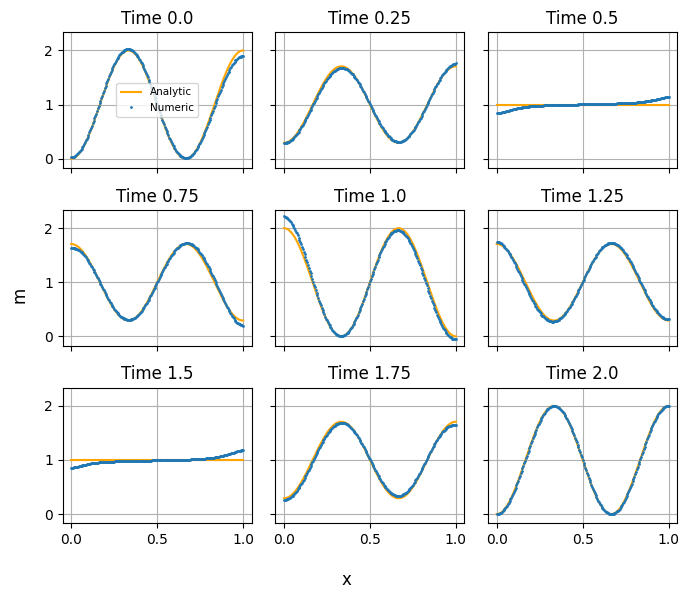

In [52]:
fncs.plot_different_times(M_MFG_2, test2_MFG.m, test2_MFG.setup_dict, sharey=True, ylabel="m", filename="DVM_b01_m")

In [53]:
M_analytic_MFG_2 = test2_MFG.m(test2_MFG.setup_dict["grid_x"],test2_MFG.setup_dict["grid_t"])
M_error_MFG_2 = fncs._calc_rel_error(M_MFG_2[:,0],M_analytic_MFG_2[:,0],"K")
print("The relative K error in M in the last timestep is {:.2e}".format(M_error_MFG_2))

The relative K error in M in the last timestep is 2.94e-02


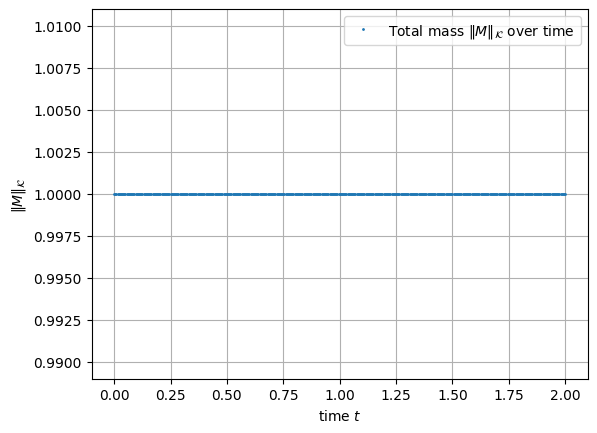

In [54]:
fncs.plot_total_mass(**test2_MFG.setup_dict, filename="DVM_b01_total_mass")

In [55]:
# Removes these large data structures from the computer memory
del test2_MFG
del U_MFG_2, U_analytic_MFG_2, U_error_MFG_2
del M_MFG_2, M_analytic_MFG_2, M_error_MFG_2

## $b=0.01$

**Beware: This part spends a lot of time to finally diverge.**

c:\Users\sindr\Documents\GitHub\Masters_Thesis\functions.py:426: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  return fsolve(_HJ_scheme_implicit, U_internal_start_guess,
c:\Users\sindr\Documents\GitHub\Masters_Thesis\functions.py:426: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  return fsolve(_HJ_scheme_implicit, U_internal_start_guess,


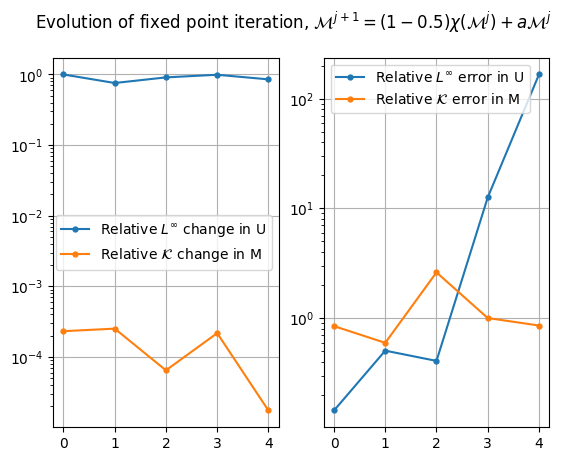

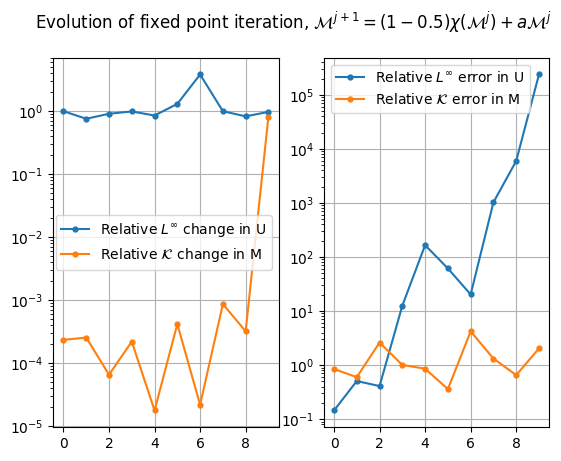

KeyboardInterrupt: 

In [48]:
test3_MFG = test.Test1_MFG(N_x=500,t_end=2,b=0.01)
U_MFG_3,M_MFG_3 = fncs.MFG_solver(fncs.HJ_implicit, fncs.FP_implicit,fncs.godunov,
                              **test3_MFG.setup_dict, m=test3_MFG.m, u= test3_MFG.u,
                              stop=10**-5, iterations=50, plot_freq=5, lamda = 1/2, type=1)

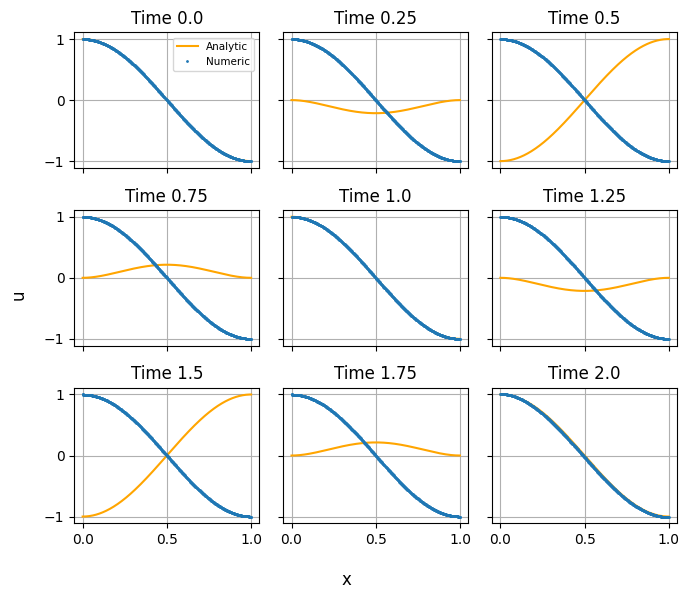

In [ ]:
fncs.plot_different_times(U_MFG_3, test3_MFG.u, test3_MFG.setup_dict,sharey=True, ylabel="u", filename="DVM_b001_u")

In [ ]:
U_analytic_MFG_3 = test3_MFG.u(test3_MFG.setup_dict["grid_x"],test3_MFG.setup_dict["grid_t"])
U_error_MFG_3 = fncs._calc_rel_error(U_MFG_3[:,-1],U_analytic_MFG_3[:,-1],"infty")
print("The relative l-infinity error in U in the last timestep is {:.2e}".format(U_error_MFG_3))

The relative l-infinity error in U in the last timestep is 3.13e-02


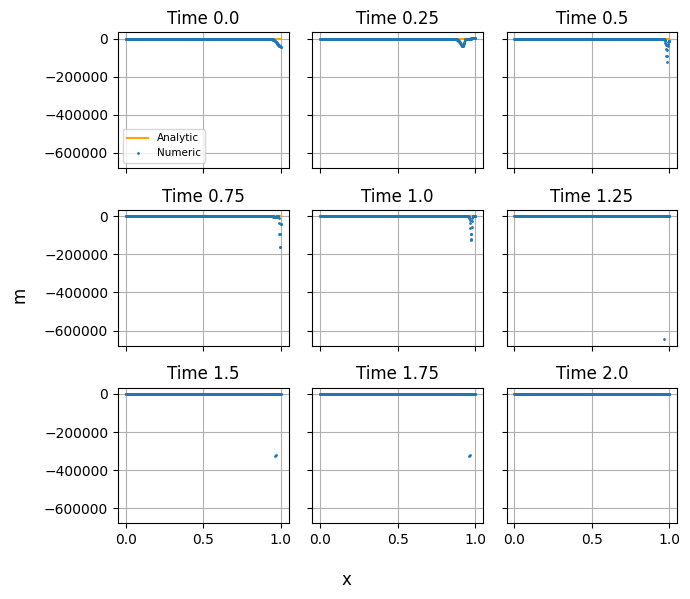

In [ ]:
fncs.plot_different_times(M_MFG_3, test3_MFG.m, test3_MFG.setup_dict, sharey=True, ylabel="m", filename="DVM_b001_m")

In [ ]:
M_analytic_MFG_3 = test3_MFG.m(test3_MFG.setup_dict["grid_x"],test3_MFG.setup_dict["grid_t"])
M_error_MFG_3 = fncs._calc_rel_error(M_MFG_3[:,0],M_analytic_MFG_3[:,0],"K")
print("The relative K error in M in the last timestep is {:.2e}".format(M_error_MFG_3))

The relative K error in U in the last timestep is 1.30e+03


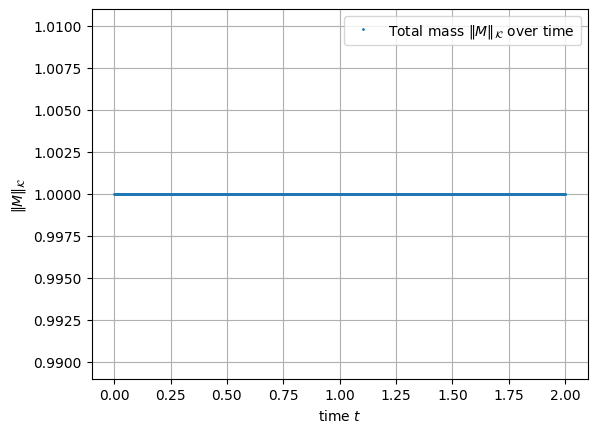

In [ ]:
fncs.plot_total_mass(**test3_MFG.setup_dict, filename="DVM_b001_total_mass")

In [ ]:
# Removes these large data structures from the computer memory
del test3_MFG
del U_MFG_3, U_analytic_MFG_3, U_error_MFG_3
del M_MFG_3, M_analytic_MFG_3, M_error_MFG_3